<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [137]:
import pandas as pd
import psycopg2
import urllib.parse as req 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [139]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [140]:
query_3_1 = '''select
                   count(id) cnt_vacancies
               from vacancies
            '''

In [141]:
df = pd.read_sql_query(query_3_1, connection)
df

,cnt_vacancies
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [142]:
query_3_2 = '''select
                   count(id) cnt_employers
               from employers
            '''

In [143]:
df = pd.read_sql_query(query_3_2, connection)
df

,cnt_employers
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [144]:
query_3_3 = '''select 
                   count(id) cnt_areas
               from areas
            '''

In [145]:
df = pd.read_sql_query(query_3_3, connection)
df

,cnt_areas
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [146]:
query_3_4 = '''select
                   count(id) cnt_industries
               from industries
            '''

In [147]:
df = pd.read_sql_query(query_3_4, connection)
df

,cnt_industries
0,294


***

**Вывод по предварительному анализу данных:**  
В представленной к изучению базе имеется 49197 вакансий, перечислены 23501 работодатель и 1362 региона, названы  294  сферы деятельности 

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [148]:
query_4_1 = '''select
                   a.name area,
                   count(v.id) cnt
               from areas a 
               join vacancies v on a.id = v.area_id --соединяем таблицу areas и vacancies
               group by area -- группируем по названию региона
               order by cnt desc -- сортируем по убыванию
            '''

In [149]:
df = pd.read_sql_query(query_4_1, connection)
df

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [150]:
query_4_2 = '''select
                   count(id) not_empty
               from vacancies
               where salary_to is not Null or salary_from is not Null -- заполнено хотя бы одно поле с зарплатой
            '''

In [151]:
df = pd.read_sql_query(query_4_2, connection)
df

,not_empty
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [152]:
query_4_3 = '''select
                   round(avg(salary_from)) avg_salary_from, -- среднее для нижней границы
                   round(avg(salary_to)) avg_salary_to -- среднее для верхней границы
               from vacancies
            '''

In [153]:
df = pd.read_sql_query(query_4_3, connection)
df

,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [154]:
query_4_4 = '''select
                   schedule,
                   employment,
                   count(id) cnt
               from vacancies
               group by schedule, employment -- группируем по 1 и 2
               order by cnt desc -- сортируем по убыванию
            '''

In [155]:
df = pd.read_sql_query(query_4_4, connection)
df

,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [156]:
query_4_5 = '''select
                   experience,
                   count(id) cnt
               from vacancies
               group by experience -- группируем по 1
               order by cnt --сортируем по возрастанию
            '''

In [157]:
df = pd.read_sql_query(query_4_5, connection)
df

,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

# Дополнительный анализ

6. Запрос у какого количества вакансий заполнены поля с зарплатой + колонка с процентами

In [158]:
query_4_6 = ''' with salary_table as ( -- создаём временную таблицу методом объединения 4-х строк
                    select
                        'Минимум и Максимум' salary,
                        count(id) vacancies
                    from
                        vacancies 
                    where salary_from is not null and salary_to is not null -- заполнены оба поля с зарплатой
                    union
                    select
                        'только Минимум',
                        count(id)
                    from
                        vacancies 
                    where salary_from is not null AND salary_to is null -- заполнено только поле с минимумом зарплаты
                    union
                    select
                        'только Максимум',
                        count(id)
                    from
                        vacancies 
                    where salary_from IS NULL AND salary_to is not null -- заполнено только поле с максимумом зарплаты
                    union
                    select
                        'Отсутствует',
                        count(id)
                    from
                        vacancies 
                    where salary_from is null and salary_to is null -- не заполнены оба поля с зарплатой 
                    )
                    select -- итоговая таблица 
                       *,
                        round(vacancies/(select sum(vacancies) from salary_table)*100) percent -- вычисление процента 
                    from
                        salary_table
                    order by vacancies desc -- сортировка по убыванию
            '''

In [159]:
df = pd.read_sql_query(query_4_6, connection)
df

,salary,vacancies,percent
0,Отсутствует,25124,51.0
1,только Минимум,11383,23.0
2,Минимум и Максимум,10102,21.0
3,только Максимум,2588,5.0


7. Запрос на определение процента вакансий с Удалённой работой, Полным днём и Гибким графиком

In [160]:
query_4_7 = '''with w as ( -- временная таблица с количеством вакансий по трём категориям рабочего графика
               select
                   schedule,
                   count(*) cnt
               from vacancies
               where schedule in ('Полный день', 'Удаленная работа', 'Гибкий график')
               group by schedule
               order by cnt desc
               )
               select
                   schedule,
                   100*cnt/(select count(id) from vacancies) percent -- превращаем количество в проценты
               from w
            '''

In [161]:
df = pd.read_sql_query(query_4_7, connection)
df

,schedule,percent
0,Полный день,74
1,Удаленная работа,18
2,Гибкий график,4


**Выводы по детальному анализу вакансий:**  
* Предсказумо лидерами среди регионов по количеству размещенных вакансий являются регионы - мегаполисы с развитой промышленностью, хозяйственной инфраструктурой, являющихся управленческими центрами регионов Российской Федерации и стран СНГ, для которых требуется мощное информационное обеспечение.   
* Более чем у половины вакансий (51%) не указан размер зарплаты. Отсутствие такого важного параметра усложняет выбор и предложение вакансии клиенту.  
* Среднее значение по нижней границе ЗП - 71065 по верхней границе ЗП - 110537. Это ниже средней ЗП в ИТ-сфере за 2022 г (140 тыс. руб), что, вероятно, вызвано тем что ожидаются начинающие (с опытом от 1 до 3 лет) специалисты.  
* Наиболее востребованные работники - работники на полный рабочий день с поной занятностью с опытом работы от 1 до 3 лет. Больше четверти вакансий ждут работников со стажем от 3 до 6 лет.  74 процента соискателей ждёт полный рабочий день в офисе. 18 процентов могут рботать на удалёнке.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [162]:
query_5_1 = '''(select  -- заключение запроса в скобки позволяют производить группировку до объединения
                    'На первом месте' hierarchy,
                    e.name,
                    count(v.id) cnt
                from employers e
                    join vacancies v on e.id = v.employer_id
                group by hierarchy, e.name -- группируем по иерархии и имени работодателя
                order by cnt desc -- сортируем по убыванию
                limit 1) -- выводим работодателя на 1 месте
        
                union all -- объединяем таблицы чтобы вывести работодателей на 1 и 5 месте

                (select
                    'На пятом месте' hierarchy,
                    e.name,
                    count(v.id) cnt
                from employers e
                    join vacancies v on e.id = v.employer_id
                    group by hierarchy, e.name
                order by cnt desc
                offset 4 limit 1) -- выводим работодателя на 5-м месте
            '''

In [163]:
df = pd.read_sql_query(query_5_1, connection)
df

,hierarchy,name,cnt
0,На первом месте,Яндекс,1933
1,На пятом месте,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [164]:
query_5_2 = '''select
                   a.name area_name,
                   count(e.id) employers_count,
                   count(v.id) vacancies_count
               from areas a
                   left join employers e on a.id = e.area
                   left join vacancies v on a.id = v.area_id
               group by a.name
               having count(v.id) = 0 -- выделяем регионы где нет вакансий 
               order by employers_count desc -- сортируем по убыванию
            '''

In [165]:
df = pd.read_sql_query(query_5_2, connection)
df

,area_name,employers_count,vacancies_count
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
588,Струнино,0,0
589,Славгород (Алтайский край),0,0
590,Сорочинск,0,0
591,Ленинский (Тульская область),0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [166]:
query_5_3 = '''select   
                   e.name employer_name,
                   count(distinct v.area_id) area_cnt --считаем только уникальные регионы
               from employers e
                   join vacancies v on e.id = v.employer_id
               group by employer_name
               order by area_cnt desc
            '''

In [167]:
df = pd.read_sql_query(query_5_3, connection)
df

,employer_name,area_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [168]:
query_5_4 = '''select
                   count(distinct e.id) - count(distinct i.employer_id) cnt -- разность между всеми работодателями и теми у кого указана сфера деятельности
               from employers e
                   left join employers_industries i on e.id = i.employer_id
            '''

In [169]:
df = pd.read_sql_query(query_5_4, connection)
df

,cnt
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [170]:
query_5_5 = '''select
                   e.name employer_name,
                   count(i.industry_id) industry_cnt
               from employers e 
                   join employers_industries i on e.id = i.employer_id
               group by e.name
               having count(i.industry_id) = 4  -- фильтр на наличие 4 сфер деятельности
               order by 1
               offset 2 -- отрезаем первые 2 строки
               limit 1 -- выводим 1 строку (изначально 3)
            '''

In [171]:
df = pd.read_sql_query(query_5_5, connection)
df

,employer_name,industry_cnt
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [172]:
query_5_6 = '''select
                   i.name industrie_name,
                   count(e.employer_id)
               from industries i
                   join employers_industries e on i.id = e.industry_id 
               group by i.name
               having i.name = 'Разработка программного обеспечения' -- фильтр после группировки
            '''

In [173]:
df = pd.read_sql_query(query_5_6, connection)
df

,industrie_name,count
0,Разработка программного обеспечения,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [174]:
path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России')#Преобразуем относительный URL-адрес 
url = path_common.scheme + '://' + req.quote(path_common.netloc) + req.quote(path_common.path)#в абсолютный URL-адрес с помощью библиотеки urllib.parse
df = pd.read_html(url)[1]#Выбираем таблицу с городами миллионниками
million_cities_lst = df['Город'].apply(lambda x: x.replace('[a]', '')).to_list()#Создаём список из столбца с городами, удаляя возможные в строках df ссылки '[a]'
million_cities_tpl = tuple(million_cities_lst)#Преобразуем полученный список в кортеж для передачи в строку sql-запроса

In [175]:
query_5_7 = f'''with w as ( -- создаём временную таблицу 'w' городов миллионников с колличеством вакансий 'Яндекс'
                select
                    a.name region_name, --регионы в которы представлена компания "Яндекс"
                    count(v.id) count_vacancies --кол-во вакансий "Яндекса" в этих регионах
                from vacancies v
                    join employers e on v.employer_id = e.id -- объединяем таблицы vacancies и employers для фильтрации по 'Яндекс'
                    join areas a on v.area_id = a.id -- объединяем таблицы vacancies и areas для группировки по регионам
                where e.name = 'Яндекс'
                group by a.name
                having a.name in {million_cities_tpl} -- фильтруем регионы по списку(корнежу) с городами - миллионниками
                order by 2 -- сортируем по возрастанию количества вакансий
                )
                select * from w union all select 'Total', sum(count_vacancies) from w -- присоединяем снизу к таблице 'w' строку Total
            '''

In [176]:
df = pd.read_sql_query(query_5_7, connection)
df

,region_name,count_vacancies
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Уфа,26.0
8,Самара,26.0
9,Краснодар,30.0


***

# Дополнительный анализ

8. Узнаем ТОП-10 работодателей с наибольшим числом вакансий 

In [177]:
query_5_8 = '''select  
                   e.name,
                   count(v.id) cnt
               from employers e
                   join vacancies v on e.id = v.employer_id
               group by e.name -- группируем по иерархии и имени работодателя
               order by cnt desc -- сортируем по убыванию
               limit 10
            '''

In [178]:
df = pd.read_sql_query(query_5_8, connection)
df

,name,cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
5,ИК СИБИНТЕК,327
6,МТС,292
7,DataArt,247
8,Совкомбанк Технологии,204
9,Первый Бит,176


9. Узнаем ТОП-5 работодателей с наибольшим числом вакансий на удалёнке

In [179]:
query_5_9 = '''select 
                   e.name,
                   count(v.schedule) cnt
               from employers e 
                   join vacancies v on e.id = v.employer_id
               where v.schedule = 'Удаленная работа'
               group by e.name
               order by cnt desc
               limit 5
            '''

In [180]:
df = pd.read_sql_query(query_5_9, connection)
df

,name,cnt
0,Яндекс,1690
1,DataArt,165
2,Тинькофф,95
3,Nitka Technologies,77
4,ООО ЕФИН,71


10. Запрос на распределение компаний по числу сфер деятельности

In [181]:
query_5_10 = '''select
                    e.name employer_name,
                    count(i.industry_id) industry_cnt

                from employers e 
                    join employers_industries i on e.id = i.employer_id

                group by e.name
                order by industry_cnt desc 
             
             '''

In [182]:
df = pd.read_sql_query(query_5_10, connection)
df

,employer_name,industry_cnt
0,Модуль,16
1,Простые решения,11
2,Прайд,10
3,Энергия,10
4,Эксперт,9
...,...,...
14951,EXE.CTLY,1
14952,Инмет,1
14953,Группа компаний Перемена,1
14954,QALANKZ,1


**Выводы по анализу работодателей:**  
* По количеству вакансий лидирует "Яндекс" - 1933 вакансии, это примерно 4% от общего количества, что не удивительно, ведь компания - номер один в рускоязычном секторе интернета, охватывающего многомиллионую (видимо самую большую) аудиторию. Основная сфера деятельности позволяет иметь достаточно большой штат сотрудников на "удаленке" (1690 вакансий) в различных регионах и даже странах.  
* Среди регионов попадаются те в которых нет вакансий, но есть работодатели. Видимо таблицы в базе созданы на долгий период и систематически обновляются.   
* По количеству регионов в которых размещены вакансии компании, ожидаемо лидирует "Яндекс" (181 регион), на втором месте компания "Ростелеком" (152). Ведь география рускоязычного интернета гораздо шире сферы услуг "Ростелекома".
* На примере распределения вакансий по регионам для "Яндекс" хорошо прослеживается кореляция количества рабочих мест с населением и статусностью регионов.  
* Около 40% работодателей не указывает сферу деятельности. Это несколько усложняет предварительный анализ вакансии.   
* 3553 компаний, занимающихся разработкой ПО.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [183]:
query_6_1 = '''select
                   count(name) count_vacancies_related_to_data
               from vacancies 
               where lower(name) like '%data%' or lower(name) like '%данн%'
            '''

In [184]:
df = pd.read_sql_query(query_6_1, connection)
df

,count_vacancies_related_to_data
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

**В следующих заданиях мы продолжим работать с вакансиями по этому условию.**

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [185]:
query_6_2 = '''select
                   count(name) count_vacancies_for_junior
               from vacancies 
               where ( -- фильтр вакансий для дата-саентистов
               name ilike '%data scientist%' or 
               name ilike '%data science%' or 
               name ilike '%исследователь данных%' or
               name ilike '%machine learning%' or 
               name ilike '%машинн%обучен%' or 
               name like '%ML%' and name not like '%HTML%'
               ) and 
               ( -- фильтр для начинающих IT-шников
               name ilike '%junior%' or 
               experience = 'Нет опыта' or 
               employment = 'Стажировка'
               )
            '''

In [186]:
df = pd.read_sql_query(query_6_2, connection)
df

,count_vacancies_for_junior
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

**Критерии для отнесения вакансии к DS указаны в предыдущем задании.**

In [187]:
query_6_3 = '''select
                   count(key_skills) count_vacancies_with_sql_or_postgres
               from vacancies
               where (
               name ilike '%data scientist%' or 
               name ilike '%data science%' or 
               name ilike '%исследователь данных%' or
               name ilike '%machine learning%' or 
               name ilike '%машинн%обучен%' or 
               name like '%ML%' and name not like '%HTML%'
               ) and 
               ( -- фильтр для навыков SQL или postgres
               key_skills ilike '%SQL%' or
               key_skills ilike '%postgres%' 
               )
            '''

In [188]:
df = pd.read_sql_query(query_6_3, connection)
df

,count_vacancies_with_sql_or_postgres
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

**Это можно сделать помощью запроса, аналогичного предыдущему.**

In [189]:
query_6_4 = '''select
                   count(key_skills) count_vacancies_with_python
               from vacancies
               where (
               name ilike '%data scientist%' or 
               name ilike '%data science%' or 
               name ilike '%исследователь данных%' or
               name ilike '%machine learning%' or 
               name ilike '%машинн%обучен%' or 
               name like '%ML%' and name not like '%HTML%'
               ) and key_skills ilike '%Python%' -- фильтр для ключевого навыка - 'Python'
            '''

In [190]:
df = pd.read_sql_query(query_6_4, connection)
df

,count_vacancies_with_python
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [191]:
query_6_5 = '''select
                   round(avg(length(key_skills) -- количество навыков в строке определяем по разности длины строки с длиной строки без разделителей + 1
                         -length(replace(key_skills, CHR(9), '')) +1), 2) avg_count_key_skills
               from vacancies
               where (
               name ilike '%data scientist%' or 
               name ilike '%data science%' or 
               name ilike '%исследователь данных%' or
               name ilike '%machine learning%' or 
               name ilike '%машинн%обучен%' or 
               name like '%ML%' and name not like '%HTML%'
               )  
            '''

In [192]:
df = pd.read_sql_query(query_6_5, connection)
df

,avg_count_key_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [193]:
query_6_6 = '''select
                   distinct experience, -- уникальные значения требуемого опыта
                   -- с помощью функции coalesce() выполняем п.2 условия
                   round(avg(( coalesce(salary_to, salary_from) +  coalesce(salary_from, salary_to))/2)) salary_average 
               from vacancies
               where (
               name ilike '%data scientist%' or 
               name ilike '%data science%' or 
               name ilike '%исследователь данных%' or
               name ilike '%machine learning%' or 
               name ilike '%машинн%обучен%' or 
               name like '%ML%' and name not like '%HTML%'
               ) and (salary_to is not null or salary_from is not null) -- фильтр двух полей без зарплаты
               group by experience
            '''

In [194]:
df = pd.read_sql_query(query_6_6, connection)
df

,experience,salary_average
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


# Дополнительный анализ

7. Выясним, сколько всего вакансий для дата - саентистов?

In [195]:
query_6_7 = '''select
                   count(*) cnt_vacancies_for_DS
               from vacancies 
               where ( -- фильтр вакансий для дата-саентистов
               name ilike '%data scientist%' or 
               name ilike '%data science%' or 
               name ilike '%исследователь данных%' or
               name ilike '%machine learning%' or 
               name ilike '%машинн%обучен%' or 
               name like '%ML%' and name not like '%HTML%'
               ) 
            '''

In [196]:
df = pd.read_sql_query(query_6_7, connection)
df

,cnt_vacancies_for_ds
0,480


8. Кто из работодателей ждёт саентистов?

In [197]:
query_6_8 = '''select
                   e.name name_employer,
                   count(v.id) vacancies -- подсчет вакансий для каждого работодателя 
               from 
                    employers e
               join vacancies v on v.employer_id = e.id
               where (
               v.name ilike '%data scientist%' or 
               v.name ilike '%data science%' or 
               v.name ilike '%исследователь данных%' or
               v.name ilike '%machine learning%' or 
               v.name ilike '%машинн%обучен%' or 
               v.name like '%ML%' and v.name not like '%HTML%'
               )
               group by e.name
               order by vacancies desc
               limit 10
           '''

In [198]:
df = pd.read_sql_query(query_6_8, connection)
df

,name_employer,vacancies
0,СБЕР,37
1,Bell Integrator,25
2,Банк ВТБ (ПАО),18
3,VK,15
4,Positive Technologies,11
5,Яндекс,9
6,EvenBet Gaming,9
7,МегаФон,8
8,Andersen,7
9,Ozon,6


9. Выясним как зависит зарплата от ключевых навыков?

In [199]:
query_6_9 = '''select
                   (length(key_skills) -- количество навыков в строке определяем по разности длины строки с длиной строки без разделителей + 1
                         -length(replace(key_skills, CHR(9), '')) +1) skills,
                   coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from) / 2 salary, -- вычисляем среднюю зарплату
                   key_skills
               from vacancies 
               where ( -- фильтр вакансий для дата-саентистов
               name ilike '%data scientist%' or 
               name ilike '%data science%' or 
               name ilike '%исследователь данных%' or
               name ilike '%machine learning%' or 
               name ilike '%машинн%обучен%' or 
               name like '%ML%' and name not like '%HTML%'
               ) and
               (salary_to is not null or salary_from is not null)
               order by salary desc
            '''

In [200]:
df = pd.read_sql_query(query_6_9, connection)
df

,skills,salary,key_skills
0,4.0,550000,Нейронные сети\tУдаленная работа\tMachine Lear...
1,5.0,500000,Tableau\tАнглийский язык\tPython\tАнализ данны...
2,4.0,450000,машинное обучение\tалгоритмы\tcomputer vision\...
3,14.0,450000,Python\tМатематическая статистика\tSQL\tLinux\...
4,5.0,450000,PyTorch\tPython\tTensorflow\tComputer Vision\t...
...,...,...,...
57,8.0,85000,Python\tOpenCV\tTensorflow\tComputer Vision\tН...
58,10.0,75000,Python\tSQL\tMachine Learning\tData Science\tА...
59,5.0,75000,Python\tSQL\tАнглийский язык\tLinux\tООП
60,5.0,75000,Python\tМатематическая статистика\tSQL\tPandas...


***

**Выводы по предметному анализу:**  
* В базе 1771 вакансий, связанных с данными.
* Фильтр на дата - саентиста проходят 480 вакансий. 
* Для начинающих саентистов всего 51 вакансия.
* 201 вакансия для DS требует в качестве ключевого навыка SQL или postgres, а python 351 вакансия. Кандидатам следует поддерживать форму в этих навыках.   
* Величину зарплаты для DS указывают лиш 62 работодателя, что составляет 13% в отличие от 49% в общем случае. Предположительно, работодатели решение этого вопроса откладывают на собеседование.
* DS с опытом работы 3-6 лет может расчитывать в среднем на ЗП в 243115 руб., а с опытом 1-3 года ЗП около 140 тыс. руб. ЗП у дата-саентистов заметно выше средних показателей приблизительно в 1.8 раз.
* В вакансиях для DS в среднем указывают более 6 ключевых навыков, при этом, кореляции их числа  с предлагаемой зарплатой не прослеживается. 
* Потребность в дата-саентистах не корелирует с общим числом вакансий у работодателей. Так Яндекс заявил потребность лишь в 9-ти саентистах.

# Общий вывод по проекту

* Всего в базе представлено 49197, общее количество работодателей 23501, из них с вакансиями 14906. Среднее количество вакансий у работодателя: 3.3
* Распределение вакансий по регионам, прямо коррелирует с административной значимостью и численностью населения. В первых рядах по количеству вакансий находятся города - миллионники, столицы стран СНГ, административные центры субъектов Российской Федерации, крупнейшие города помимо них. Так на долю Москвы приходится почти 11 % от общего количества вакансий, доля Санкт-Петербурга почти 6 %. На третьем месте Минск с более, чем 4 %.
* Более половины вакансий - 51 %, не имеют каких-либо указаний на предлагаемую заработную плату. Средние значения для нижней и верхней границы зарплатной вилки составляют 71 и 110 тыс. рублей, соответственно.
* Более 80 % вакансий предполагают личное присутствие на рабочем месте (полный день, сменный и гибкий график), на долю удаленной работы приходится около 19 %. Вахтовый метод примерно 0.8 %. Относительно формата занятости: более 93 % вакансий предполагают полную занятость. Частичная занятость и стажировка - всего чуть больше 4% и 1.5%, соответственно. Проектная работа, менее 1 %.
* В большинстве вакансий (более 85 %) указан требуемый опыт работы. Половина работодателей хотят видеть молодых специалистов с опытом от 1 до 3 лет, почти 30% ждут опытных специалистов с опытом от 3 до 6 лет и 2.7% - больше 6 лет опыта. При росте опыта растет предлагаемая зарплата.
* У работодателей наблюдается кореляция числа вакансий с числом регионов, т.е. при росте числа вакансий растет число регионов публикации. По количеству вакансий и регионов публикации лидирует компания "Яндекс" - 1933 вакансии примерно 4% от общего количества, на втором месте компания "Ростелеком", что соответствует, в свою очередь, охвату пользователей. 
* У примерно 36% работодателей не указана сфера деятельности. Это усложняет анализ.
* Связь между количеством ключевых навыков и зарплатой не прослеживается.

## Для «Data Science»:
* 1771 вакансия имеет отношение к данным (в названии присутствуют или «data» или «данн»), это 3.6 % от всего количества вакансий. Фильтр на дата - саентиста проходят 480 вакансий, или чуть меньше 1 %.
*  Для начинающих саентистов всего 51 вакансия.
* 201 вакансия для DS требует в качестве ключевого навыка SQL или postgres, а python 351 вакансия.
* 6.41 среднее количество ключевых навыков в вакансиях для дата-сайентистов.
* В 13 % (62 вакансии) для дата-сайентистов указана одна или обе границы зарплатной вилки. Сотрудникам без опыта готовы платить 75 тыс. рублей, с опытом от 1 - 3 лет почти в два раза больше, 140 тыс. руб., а от 3 и до 6 лет: в три с половиной раза больше, 243 тыс. руб. Для опыта свыше 6 лет – зарплата не указана.  Максимальная и минимальная указанные зарплаты: 55.5 и 550 тыс. руб. Это существенно выше чем в среднем по базе.
* Связь между количеством ключевых навыков и зарплатой также отсутствует. Ключевых навыков для дата-сайентистов указано от 2 до 16. Распределение по вакансиям равномерное.


Специальность «Data Science» количественно меньше других вакансий ИТ сферы. Вакансии предлагаются чаще крупными компаниями (банки и иные финансовые компании, телекоммуникационные корпорации, интернет-гиганты торговой, социально-сетевой, игровой и т.п. направленности, торговые гиганты и т.п.), крупными промышленными компаниями и научными учреждениями. Востребованы специалисты с опытом, с набором определенных ключевых навыков. Вакансии предлагаются в крупных городах, Москве, СПб. Возможная удаленная работа. Заработная плата в целом в два  раза выше, чем в среднем для ИТ сферы и зависит в первую очередь от опыта.


# Дополнительные исследования

Попробуем выяснить наличие связи между зарплатой, количеством ключевых требований и требуемым опытом для всей базы вакансий. При этом будем рассматривать вакансии в которых указана хоть какая-то заработная плата (все таки нас интересует связь именно с зарплатой). А для случая отсутствия ключевых навыков приравняем их количество к 0.

In [201]:
query_7_1 = ''' select
                    (length(coalesce(key_skills, '1')) - length(replace(coalesce(key_skills, '2'), CHR(9), ''))::int + 1) skills, -- вычисляем количество навыков.В случае отсутствия навыков: 1 - 2 + 1 = 0
                    round(coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from) / 2) salary, -- вычисляем среднюю зарплату
                    experience
                from
                    vacancies
                where salary_from is not null or salary_to is not null -- условие наличия данных хотя бы для минимальной или максимальнной зарплаты
                order by experience 
            '''

In [202]:
skills_salary_exp = pd.read_sql_query(query_7_1, connection)
skills_salary_exp

,skills,salary,experience
0,3,600000.0,Более 6 лет
1,7,250000.0,Более 6 лет
2,5,147750.0,Более 6 лет
3,10,750000.0,Более 6 лет
4,4,300000.0,Более 6 лет
...,...,...,...
24068,1,90000.0,От 3 до 6 лет
24069,5,175000.0,От 3 до 6 лет
24070,13,51869.0,От 3 до 6 лет
24071,5,83400.0,От 3 до 6 лет


Создадим визуализацию предлагаемой заработной платы. Будем использовать тепловую карту с аннотацией. Построим сводную таблицу. Солбцы сводной таблицы - количество ключевых навыков, в стороки - требуемый опыт. В качестве значений возьмем медиану совокупности зарплат. 

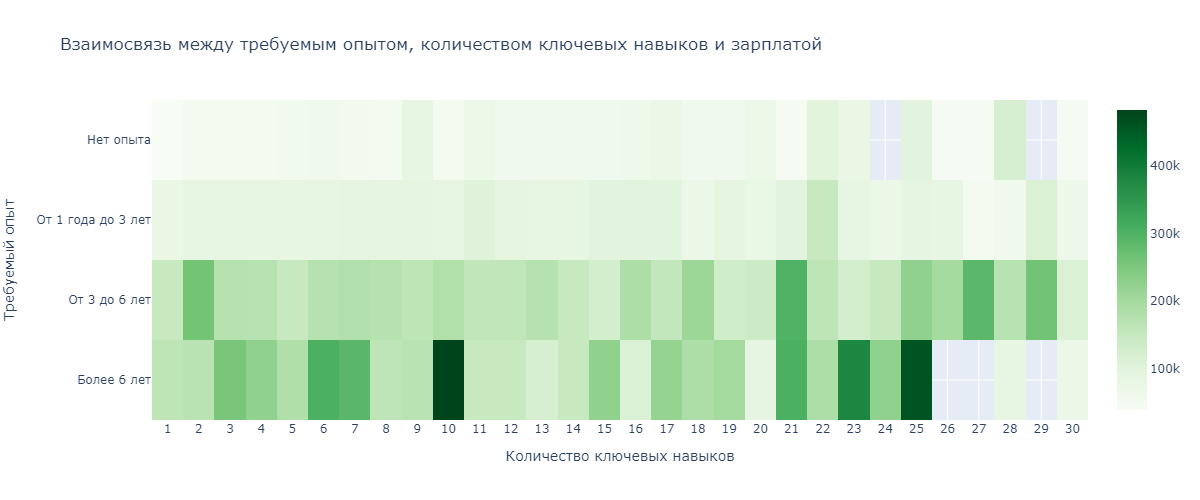

In [203]:
outflow_df = skills_salary_exp.pivot_table( # Создаём сводную таблицу
    values = 'salary',
    index = 'experience',
    columns = 'skills',
    aggfunc='median'
)

outflow_df = outflow_df.append(outflow_df.iloc[:,:]).iloc [1:, :] # Упорядычеваем (переставляем) строки таблицы

fig = px.imshow(
    outflow_df,
    title='Взаимосвязь между требуемым опытом, количеством ключевых навыков и зарплатой',
    labels={'x':'Количество ключевых навыков', 'y':'Требуемый опыт'},
    width=1200,
    height=500,

    color_continuous_scale='greens'# цветовая гамма    
    )

fig.update_xaxes(dtick=1)  # шаг тиков на оси x
# Настройка шаблона наведения курсора мыши
fig.update_traces(
    hovertemplate="Количество навыков: %{x}<br>Опыт: %{y}<br>Зарплата: %{z}"
) 
  
fig.write_html("plotly/img1.html")
fig.write_image('pictures/img1.png')
fig.show('png')

### Вывод: 
Уровень заработной платы вне зависимости от навыков, однозначно, определяет требуемый опыт.  Есть 5 "черных дыр", общюю картину это не меняет.

In [204]:
connection.close()